# 훈련 세트와 테스트 세트

### 생선 분류
- 앞의 예에서 훈련데이터에서 도미를 100% 완벽하게 분류함
    - 문제점 : 정답을 미리 알려주고 시험보는 것과 같음
    
    
-  훈련한 데이터와 평가에 사용된 데이터가 달라야 함

## Data Split과 모델 검증

- 언제
    

- 왜
  

- 어떻게
    

### 홀드-아웃 방식
- 데이터를 두 개 세트로 나누어 각각 Train과 Test 세트로 사용
- Train과 Test의 비율을 7:3 ~ 9:1로 널리 사용하나, 알고리즘의 특성 및 상황에 따라 적절한 비율을 사용
- Train – Validation - Test로 나누기도 함

## 훈련 세트와 테스트 세트

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 
               9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
               12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
               475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
               575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
               920.0, 955.0, 925.0, 975.0, 950.0, 
               6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [4]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

**훈련 데이터셋과 테스트 데이터셋으로 분리**

In [5]:
train_data = fish_data[:35]
train_target = fish_target[:35]

test_data = fish_data[35:]
test_target = fish_target[35:]

**학습 및 평가**

In [6]:
kn.fit(train_data, train_target)
kn.score(test_data, test_target)

0.0

In [7]:
train_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [8]:
test_target

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### 왜? 성능이 0.0일까?

**편향(biased)된 데이터 셋 구성** 때문에

- 샘플링 편향(Sampling Bias)

### 올바른 훈련데이터와 테스트데이터 구성하기

In [9]:
import numpy as np

In [10]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [11]:
input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [13]:
input_arr.shape

(49, 2)

### 데이터 섞기(shuffling)


In [14]:
np.random.seed(42)
index = np.arange(49)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [20]:
# 난수 섞기
np.random.shuffle(index)
index

array([45, 33,  6,  3, 36, 46, 15,  5, 28, 12,  7,  8, 19, 31, 47, 14, 20,
       13, 44, 10, 25, 48, 40, 29, 21,  4, 22, 16, 26,  0, 27,  2, 18, 24,
       11, 32, 41, 23, 42, 38, 37, 43, 30, 35,  9, 17, 34, 39,  1])

- [참고]: random.seed()
    - 난수를 생성하기 위한 초기값 지정
    - seed를 지정하면 랜덤함수의 결과를 동일하게 재현할 수 있음

In [21]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [22]:
train_input

array([[  12.4,   13.4],
       [  41. ,  975. ],
       [  29.7,  500. ],
       [  29. ,  363. ],
       [  10.5,    7.5],
       [  13. ,   12.2],
       [  32. ,  600. ],
       [  29.7,  450. ],
       [  36. ,  850. ],
       [  31.5,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  33.5,  650. ],
       [  38.5,  955. ],
       [  14.3,   19.7],
       [  32. ,  600. ],
       [  34. ,  575. ],
       [  32. ,  340. ],
       [  12.2,   12.2],
       [  31. ,  475. ],
       [  35. ,  725. ],
       [  15. ,   19.9],
       [  11.3,    8.7],
       [  37. , 1000. ],
       [  34. ,  685. ],
       [  29. ,  430. ],
       [  34.5,  620. ],
       [  33. ,  700. ],
       [  35. ,  720. ],
       [  25.4,  242. ],
       [  36. ,  714. ],
       [  26.5,  340. ],
       [  33.5,  610. ],
       [  35. ,  700. ],
       [  31. ,  500. ]])

In [23]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [24]:
test_input

array([[ 39.5, 925. ],
       [ 11.8,  10. ],
       [ 35. , 680. ],
       [ 11.8,   9.9],
       [ 11. ,   9.7],
       [ 10.6,   7. ],
       [ 12. ,   9.8],
       [ 38.5, 920. ],
       [  9.8,   6.7],
       [ 30.7, 500. ],
       [ 33. , 700. ],
       [ 41. , 950. ],
       [ 11.2,   9.8],
       [ 26.3, 290. ]])

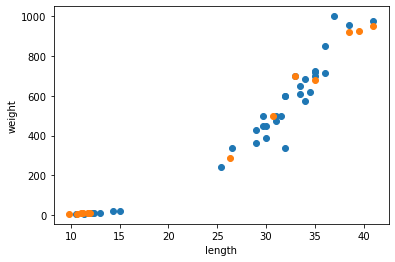

In [30]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 두 번째 머신러닝 프로그램

In [31]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [32]:
kn.score(test_input, test_target)

1.0

In [33]:
kn.predict(test_input)

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [34]:
test_target

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [35]:
kn.n_neighbors

5